# Tesla Stock Data Analysis - Revised Version

This Python notebook is designed to run in the **Google Colaboratory** environment and generates charts similar to the provided images using your data.

**Correction:** Due to the `DateParseError`, it is assumed that your CSV file has a header row containing column names. In this version, the file is read considering the header row, and the columns are named based on their position (index) and a logical guess derived from the structure of financial and social data.

In [1]:
# Install required libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import io

# Plotting settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# 1. Upload Data File
print("Please upload the file 'Tesla_Stock_Data_with_Technical_and_Social_Features_2015_2020.csv'.")
uploaded = files.upload()

# 2. Read the file assuming a header row (header=0)
file_name = list(uploaded.keys())[0]
# Since your file is assumed to have a header row, we use header=0.
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), header=0)

# 3. Name required columns based on index (guess based on data structure)
# Note: Indices start from 0, and the header row has been read as column names.
# Based on the previous error, the first column (index 0) should be the Date column.

# Manually set column names for easier handling.
df.columns = [f'Col_{i}' for i in range(len(df.columns))]

DATE_COL = 'Col_0'
CLOSE_PRICE_COL = 'Col_1'
RSI_COL = 'Col_18' # Guess for RSI_14
COMPOUND_SENTIMENT_COL = 'Col_21' # Guess for Compound Sentiment
VOLUME_COL = 'Col_29' # Guess for Vol.
RETWEETS_COL = 'Col_30' # Guess for retweets_count

# Rename columns for easier use
df.rename(columns={
    DATE_COL: 'Date',
    CLOSE_PRICE_COL: 'Close_Price',
    RSI_COL: 'RSI_14',
    COMPOUND_SENTIMENT_COL: 'compound',
    VOLUME_COL: 'Vol.',
    RETWEETS_COL: 'retweets_count'
}, inplace=True)

# 4. Data Preprocessing
# Assuming the 'Date' column is now read correctly.
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert numeric columns to float data type
for col in ['Close_Price', 'RSI_14', 'compound', 'Vol.', 'retweets_count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create Price_Lag1 column (previous day's closing price)
df['Price_Lag1'] = df['Close_Price'].shift(1)
df.dropna(inplace=True)

print(f"Data successfully loaded and processed. Number of rows: {len(df)}")
print("First 5 rows of processed data:")
print(df[['Close_Price', 'Price_Lag1', 'RSI_14', 'compound', 'Vol.', 'retweets_count']].head())

Please upload the file 'Tesla_Stock_Data_with_Technical_and_Social_Features_2015_2020.csv'.


Saving Tesla_Stock_Data_with_Technical_and_Social_Features_2015_2020.csv to Tesla_Stock_Data_with_Technical_and_Social_Features_2015_2020.csv
Data successfully loaded and processed. Number of rows: 1127
First 5 rows of processed data:
            Close_Price  Price_Lag1    RSI_14  compound      Vol.  \
Date                                                                
2015-01-05      14.0060     14.6207  0.066035 -0.602758  0.228388   
2015-01-06      14.0853     14.0060  0.069090 -0.468792  0.199464   
2015-01-07      14.0633     14.0853 -0.027115 -0.489720  0.115445   
2015-01-08      14.0413     14.0633 -0.119200 -0.489069  0.126464   
2015-01-09      13.7773     14.0413 -0.159886 -0.768924  0.122332   

            retweets_count  
Date                        
2015-01-05        0.205800  
2015-01-06        0.179355  
2015-01-07        0.158419  
2015-01-08        0.136657  
2015-01-09        0.113517  


## Chart 1: Normalized Tesla Stock Price Over Time with Train/Test Split

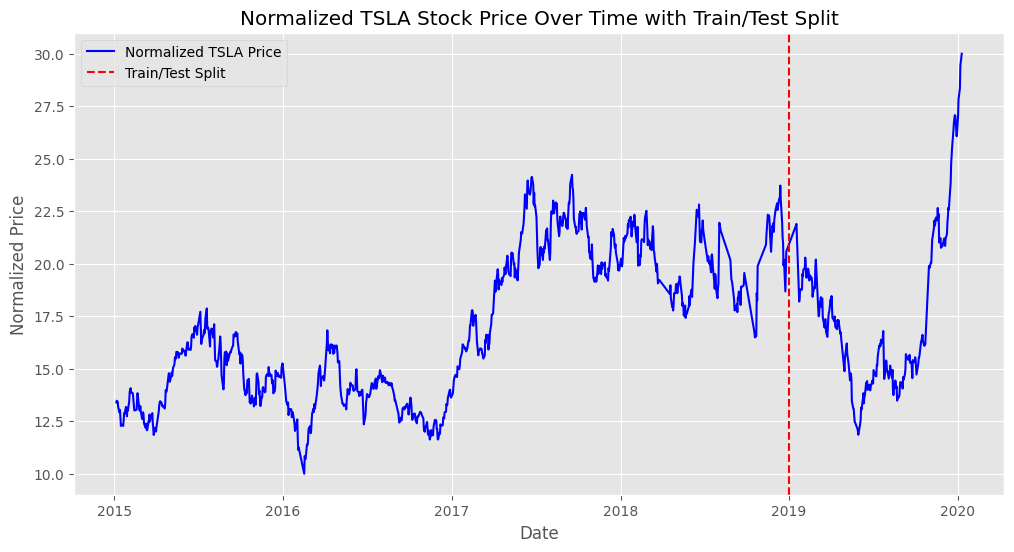

In [3]:
# Normalize the Close Price to simulate the chart's Y-axis scale
scaler = MinMaxScaler()
df['Normalized_Price'] = scaler.fit_transform(df[['Close_Price']]) * 20 + 10 # Scaling to simulate the original chart's Y-axis

# Determine the Train/Test split point (around 2019-01-01)
split_date = pd.to_datetime('2019-01-01')

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Normalized_Price'], label='Normalized TSLA Price', color='blue')
plt.axvline(x=split_date, color='red', linestyle='--', label='Train/Test Split')

plt.title('Normalized TSLA Stock Price Over Time with Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

## Chart 2: Elon Musk Twitter Compound Sentiment Over Time

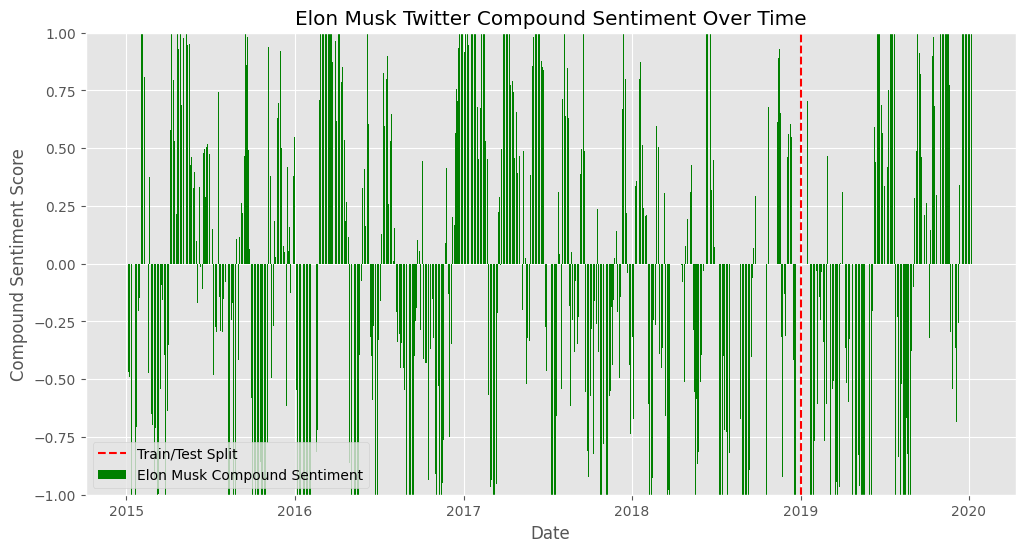

In [4]:
plt.figure(figsize=(12, 6))
# Use the bar function to simulate the thin bar plot (Stem Plot)
plt.bar(df.index, df['compound'], width=1, label='Elon Musk Compound Sentiment', color='green')
plt.axvline(x=split_date, color='red', linestyle='--', label='Train/Test Split')

plt.title('Elon Musk Twitter Compound Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.ylim(-1.0, 1.0) # Limit Y-axis to the standard sentiment range
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Chart 3: Correlation Heatmap of Key Features

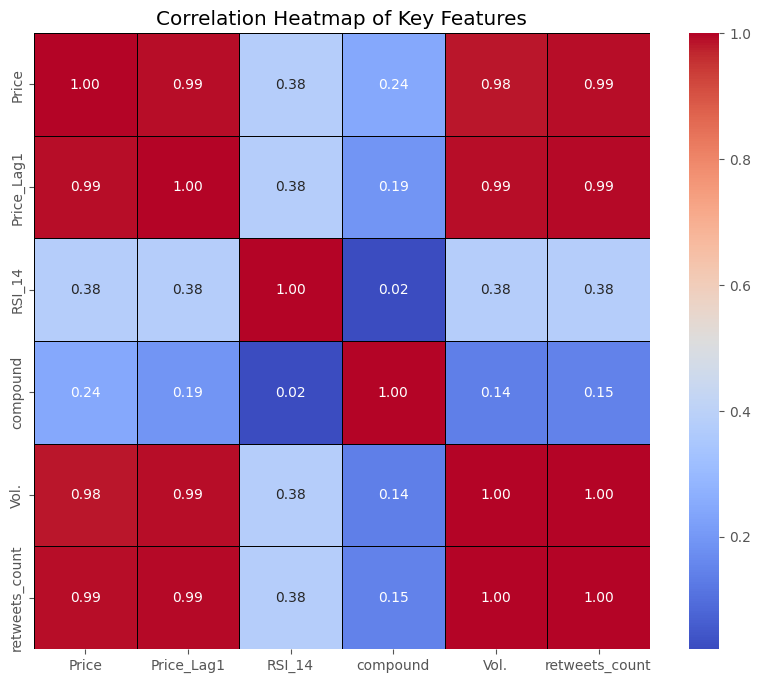

In [5]:
# Select required columns for the heatmap
features = ['Close_Price', 'Price_Lag1', 'RSI_14', 'compound', 'Vol.', 'retweets_count']
corr_df = df[features].copy()

# Rename columns to match the original chart
corr_df.rename(columns={'Close_Price': 'Price', 'Vol.': 'Vol.'}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Display correlation values
    fmt=".2f", # Number display format
    cmap='coolwarm', # Color palette
    linewidths=.5, # Lines between cells
    linecolor='black', # Line color
    cbar=True, # Display color bar
    square=True # Square cells
)

plt.title('Correlation Heatmap of Key Features')
plt.show()